In [21]:
cd C:\Users\dhant\OneDrive\Desktop\simplilearn\DS with python\project3

C:\Users\dhant\OneDrive\Desktop\simplilearn\DS with python\project3


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as p
import missingno as msno
import warnings
import calendar
warnings.filterwarnings('ignore')

In [23]:
data=pd.read_csv('Comcast_telecom_complaints_data.csv')
data.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [24]:
data.shape

(2224, 11)

In [25]:
data.size

24464

In [26]:
data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [27]:
data.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [29]:
data.nunique()

Ticket #                       2224
Customer Complaint             1841
Date                             91
Date_month_year                  91
Time                           2190
Received Via                      2
City                            928
State                            43
Zip code                       1543
Status                            4
Filing on Behalf of Someone       2
dtype: int64

# Showing Basics Statistics

In [30]:
data.describe().style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [91]:
data.describe(include=object)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224
unique,2224,1841,91,91,2190,2,928,43,4,2
top,362223,Comcast,24-06-15,24-Jun-15,2:45:12 PM,Customer Care Call,Atlanta,Georgia,Solved,No
freq,1,83,218,218,2,1119,63,288,973,2021


In [92]:
print('The dataset has {0} samples.'.format(len(data)))

The dataset has 2224 samples.


In [13]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport
pp.ProfileReport(data)

In [31]:
data.drop(columns=['Ticket #','Date','Zip code'],axis=1,inplace=True)
data.head(3)

,Customer Complaint,Date_month_year,Time,Received Via,City,State,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,Closed,No
1,Payment disappear - service got disconnected,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,Closed,No
2,Speed and Service,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,Closed,Yes


# EDA

In [56]:
data['Customer Complaint'].value_counts()

Comcast                                       83
Comcast Internet                              18
Comcast Data Cap                              17
comcast                                       13
Comcast Billing                               11
                                              ..
Non working service                            1
misleading sales practice and advertising      1
Comcast/earthlink                              1
Comcast slow speeds and lying about prices     1
Complaints about comcast                       1
Name: Customer Complaint, Length: 1841, dtype: int64

<AxesSubplot:xlabel='Received Via', ylabel='count'>

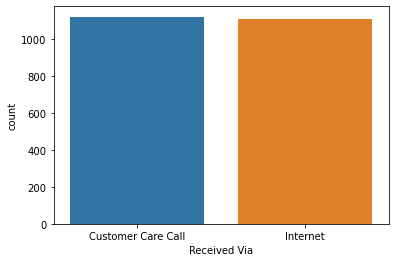

In [57]:
data['Received Via'].value_counts()
sns.countplot('Received Via',data=data)

In [58]:
data['City'].value_counts()

Atlanta             63
Chicago             47
Knoxville           36
Houston             33
Jacksonville        31
                    ..
Lutherville          1
Lake Oswego          1
North Huntingdon     1
Toney                1
Colonia              1
Name: City, Length: 928, dtype: int64

In [59]:
data['State'].value_counts()

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Delaware                 12
New Hampshire            12
Connecticut              12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
Vermont                   3
Ohio                

<AxesSubplot:xlabel='Status', ylabel='count'>

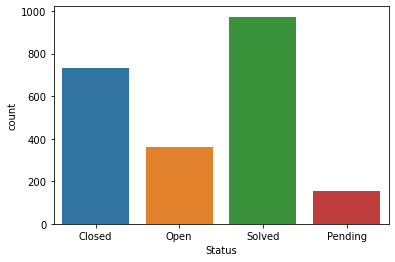

In [60]:
data['Status'].value_counts()
sns.countplot('Status',data=data)

<AxesSubplot:xlabel='Filing on Behalf of Someone', ylabel='count'>

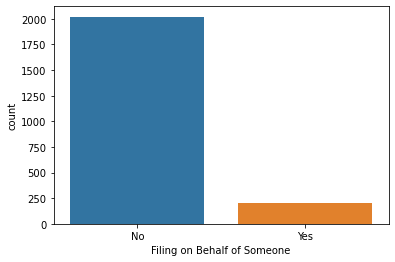

In [61]:
data['Filing on Behalf of Someone'].value_counts()
sns.countplot('Filing on Behalf of Someone',data=data)

# Provide the trend chart for the number of complaints at monthly and daily granularity levels.


In [32]:
data.head(3)

,Customer Complaint,Date_month_year,Time,Received Via,City,State,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,Closed,No
1,Payment disappear - service got disconnected,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,Closed,No
2,Speed and Service,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,Closed,Yes


In [33]:
data['Date_month_year'] = pd.to_datetime(data['Date_month_year'])
data.head(3)

,Customer Complaint,Date_month_year,Time,Received Via,City,State,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,Closed,No
1,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,Closed,No
2,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,Closed,Yes


In [34]:
Date_month_year= pd.to_datetime(data['Date_month_year'].dt.date)
#data['Date'] = pd.to_datetime(Date_month_year.dt.date)
data['Month'] = Date_month_year.dt.month
data['Date'] = Date_month_year.dt.day
data['Day_No'] = data['Date_month_year'].dt.weekday
data['Month'] = (data.Date_month_year.dt.month).apply(lambda x: calendar.month_abbr[x])
data['Day_Name'] = data['Day_No'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',
                                                 5:'Saturday',6:'Sunday'})
data.head(3)

,Customer Complaint,Date_month_year,Time,Received Via,City,State,Status,Filing on Behalf of Someone,Month,Date,Day_No,Day_Name
0,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,Closed,No,Apr,22,2,Wednesday
1,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,Closed,No,Aug,4,1,Tuesday
2,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,Closed,Yes,Apr,18,5,Saturday


In [35]:
monthly_compliant=pd.DataFrame(data.groupby(['Month'])['Customer Complaint'].value_counts())
monthly_compliant.head(30)

Customer Complaint
Month Customer Complaint                                                    
Apr   Comcast                                                             16
      comcast                                                              4
      Comcast data caps                                                    3
      availabilty                                                          3
      Billing                                                              2
      Billing Issues                                                       2
      Comcast -Exfinity customer service errors, lies...                   2
      Comcast Billing                                                      2
      Comcast Complaint                                                    2
      Comcast Internet                                                     2
      Comcast Internet Service                                             2
      Comcast internet for low income families                             2
      Comcast/Xfinity                                                      2
      Continued slowness for almost 3 weeks                                2
      Data cap                                                             2
      billing issues                                                       2
      comcast unwilling to resolve data usage issue                        2
      300 GB monthly allowance                                             1
      300GB/month data cap 'trial' for several years now                   1
      Abysmal customer service, do not approve merger...                   1
      Apartment Management's Exclusivity Contract wit...                   1
      Awful Service!                                                       1
      Bait and Switch again                                                1
      Bait and switch, unfulfilled incentives                              1
      Being charged for a technician fee                                   1
      Billed for service never received                                    1
      Billed for services not ordered or recieved                          1
      Billing - Comcast                                                    1
      Billing Error                                                        1
      Billing Issues/Service Issues                                        1

In [36]:
monthly_data = data['Month'].value_counts().to_frame()
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data = monthly_data.reindex(months_order, axis=0).reset_index().rename(columns={'index':'Month','Month':'Complaint'})
#monthly_data['Complaint']=monthly_data['Complaint'].fillna(0)
monthly_data

,Month,Complaint
0,Jan,55
1,Feb,59
2,Mar,45
3,Apr,375
4,May,317
5,Jun,1046
6,Jul,49
7,Aug,67
8,Sep,55
9,Oct,53


In [46]:
Jan_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(Jan_month[Jan_month.Month=='Jan'])
feb_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(feb_month[feb_month.Month=='Feb'])
Mar_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(Mar_month[Mar_month.Month=='Mar'])
Apr_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(Apr_month[Apr_month.Month=='Apr'])
May_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(May_month[May_month.Month=='May'])
Jun_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(Jun_month[Jun_month.Month=='Jun'])
Jul_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(Jul_month[Jul_month.Month=='Jul'])
Aug_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(Aug_month[Aug_month.Month=='Aug'])
Sep_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(Sep_month[Sep_month.Month=='Sep'])
Oct_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(Oct_month[Oct_month.Month=='Oct'])
Nov_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
print(Nov_month[Nov_month.Month=='Nov'])
Dec_month = data.groupby(['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={
    'City':'Complaints'})
Dec_month[Dec_month.Month=='Dec']

   Month  Date  Complaints
30   Jan     4          18
31   Jan     5          12
32   Jan     6          25
   Month  Date  Complaints
27   Feb     4          27
28   Feb     5           7
29   Feb     6          25
   Month  Date  Complaints
57   Mar     4          15
58   Mar     5           5
59   Mar     6          25
   Month  Date  Complaints
0    Apr     4          12
1    Apr     5          12
2    Apr     6          12
3    Apr    13          24
4    Apr    14          23
5    Apr    15          12
6    Apr    16          20
7    Apr    17          21
8    Apr    18           8
9    Apr    19           9
10   Apr    20          20
11   Apr    21          12
12   Apr    22          22
13   Apr    23          23
14   Apr    24          24
15   Apr    25          16
16   Apr    26           8
17   Apr    27          25
18   Apr    28          26
19   Apr    29          22
20   Apr    30          24
   Month  Date  Complaints
60   May     4           6
61   May     5          14
6

,Month,Date,Complaints
24,Dec,4,15
25,Dec,5,7
26,Dec,6,43


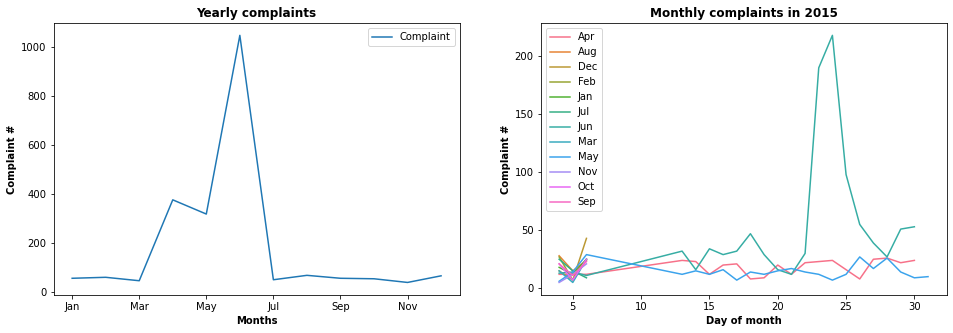

In [50]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

monthly = monthly_data.plot.line(x='Month',y='Complaint',ax=ax[0])
monthly.set_xlabel('Months',weight='bold')
monthly.set_ylabel('Complaint #',weight='bold')
monthly.set_title('Yearly complaints',weight='bold')

daily = sns.lineplot(x=Jun_month.Date,y=Jun_month['Complaints'],hue=Jun_month.Month,ax=ax[1])
daily.set_xlabel('Day of month',weight='bold')
daily.set_ylabel('Complaint #',weight='bold')
daily.legend(loc='upper left')
daily.set_title('Monthly complaints in 2015',weight='bold')

plt.show()

# Provide a table with the frequency of complaint types

In [56]:
total_complaints=data.groupby(["Customer Complaint"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)
total_complaints                                                                                                                         

,Customer Complaint,Count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,Lack of availability,1
1837,Lack of communication and poor customer service,1
1838,Lack of consistent service,1
1839,Lack of internet speed,1


# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [61]:
#Top .5%

total_complaints[(total_complaints.Count*100)/total_complaints.Count.sum() >= .5]


,Customer Complaint,Count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13


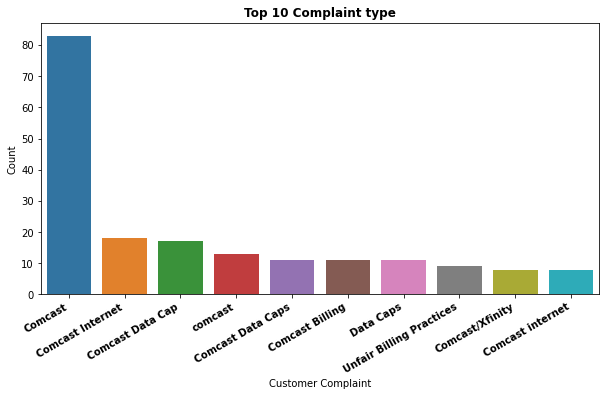

In [64]:
plt.figure(figsize=(10,5))
comp = sns.barplot(x=total_complaints['Customer Complaint'].head(10),y=total_complaints.Count.head(10))
comp.set_title('Top 10 Complaint type',weight='bold')
comp.set_xticklabels(comp.get_xticklabels(), rotation=30, ha="right",size=10,weight='bold')
plt.show()

# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64


<AxesSubplot:xlabel='Status', ylabel='count'>

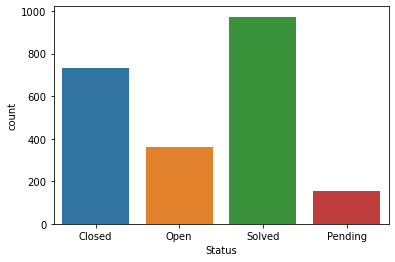

In [66]:
print(data['Status'].value_counts())
sns.countplot('Status',data=data)

In [67]:
data['Status']=data['Status'].replace('Pending','Open',regex=True)
data['Status']=data['Status'].replace('Solved','Closed', regex=True)
data.head(5)

,Customer Complaint,Date_month_year,Time,Received Via,City,State,Status,Filing on Behalf of Someone,Month,Date,Day_No,Day_Name
0,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,Closed,No,Apr,22,2,Wednesday
1,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,Closed,No,Aug,4,1,Tuesday
2,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,Closed,Yes,Apr,18,5,Saturday
3,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,Open,Yes,Jul,5,6,Sunday
4,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,Closed,No,May,26,1,Tuesday


In [68]:
data['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

after some changes the Status according to the above changes 
Closed    1707
Open       517
Name: Status, dtype: int64


<AxesSubplot:xlabel='Status', ylabel='count'>

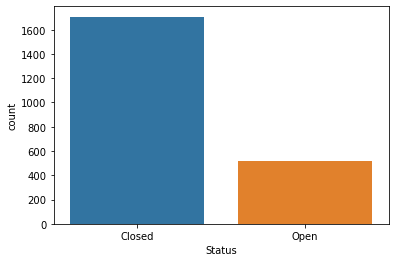

In [69]:
print('after some changes the Status according to the above changes ')
print(data['Status'].value_counts())
sns.countplot('Status',data=data)

# - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [70]:
State_status = pd.crosstab(data.State,data.Status)
State_status.head()

Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22


<Figure size 720x2160 with 0 Axes>

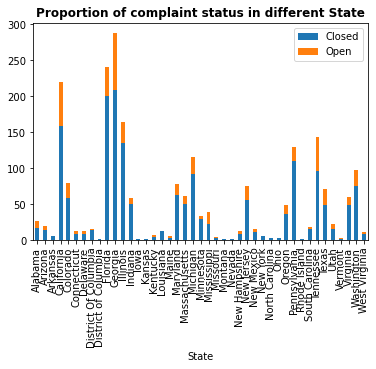

<Figure size 432x288 with 0 Axes>

In [78]:
plt.figure(figsize=(10,30))

State_status.plot(kind='bar',stacked=True)
plt.title('Proportion of complaint status in different State',weight='bold')
plt.legend(loc='best')

plt.show()
plt.tight_layout()

# Which state has the maximum complaints


Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: State, dtype: int64


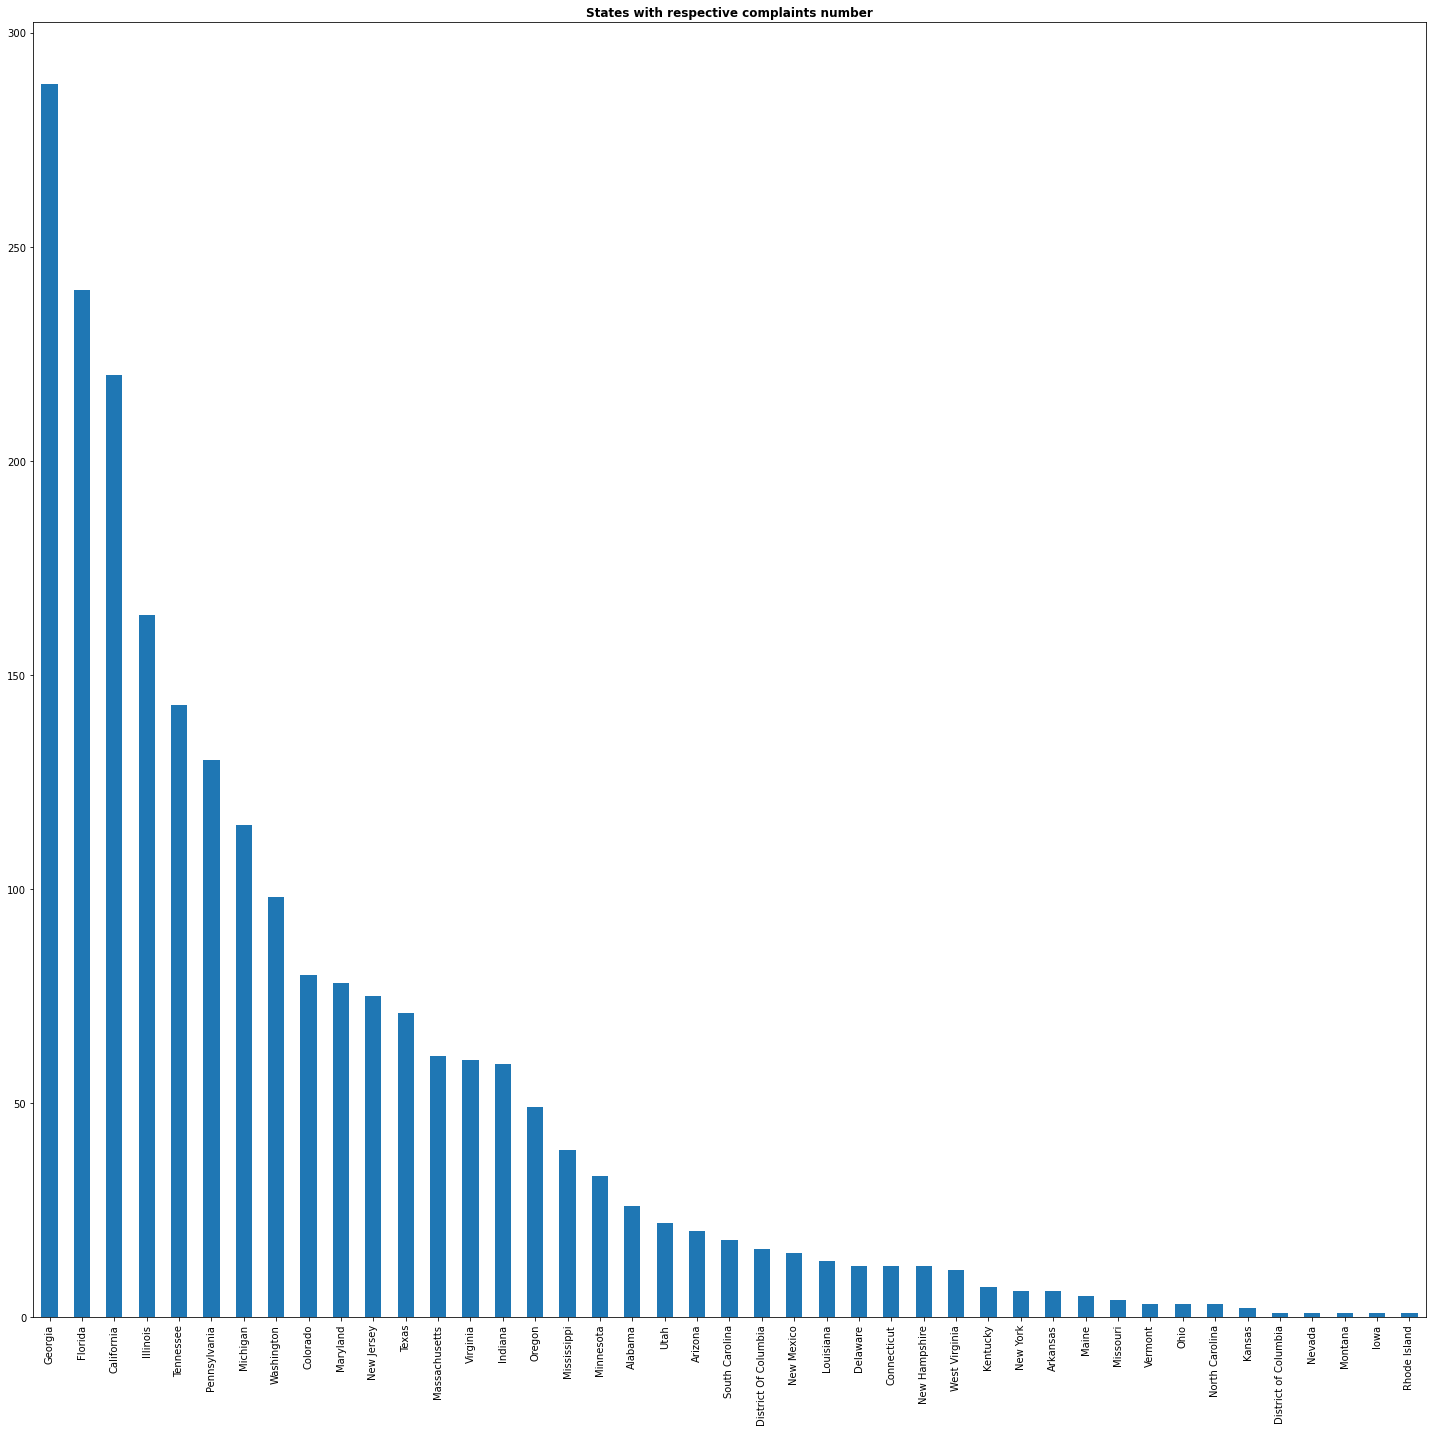

In [90]:
print(data.State.value_counts().head(5))

data['State'].value_counts().plot(kind='bar', figsize=(20,20))
plt.title('States with respective complaints number',weight='bold')
plt.tight_layout()

# Which state has the highest percentage of unresolved complaints


In [93]:
States_list=data.groupby(['State','Status']).count()['City'].reset_index().rename(columns={'City':'Counts'})
States_list

,State,Status,Counts
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6
...,...,...,...
72,Virginia,Open,11
73,Washington,Closed,75
74,Washington,Open,23
75,West Virginia,Closed,8


In [96]:
States_list[(States_list.Counts==max(States_list[(States_list.Status=='Open')].Counts))&(States_list.Status=='Open')]

,State,Status,Counts
19,Georgia,Open,80


# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [97]:
SolveCom_InCus = data.groupby(['Received Via','Status']).count()['City'].reset_index().rename(columns={'City':'Counts'})
SolveCom_InCus.head()

,Received Via,Status,Counts
0,Customer Care Call,Closed,864
1,Customer Care Call,Open,255
2,Internet,Closed,843
3,Internet,Open,262


In [99]:
sol_per = np.around((SolveCom_InCus.Counts[(SolveCom_InCus.Status=='Closed')&
                                           ((SolveCom_InCus['Received Via']=='Internet')
                                            |(SolveCom_InCus['Received Via']=='Customer Care Call'))
                                          ].sum()*100/SolveCom_InCus.Counts.sum()),decimals=2)
print('Solved percentage till date = {} %'.format(sol_per))

Solved percentage till date = 76.75 %
